<a href="https://colab.research.google.com/github/Loop3D/2022_iamg_workshop/blob/main/LoopStructural_refolded_folds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/Loop3d/LoopStructural 
!pip install lavavu-osmesa matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Loop3d/LoopStructural to /tmp/pip-req-build-83ad8gy8
  Running command git clone -q https://github.com/Loop3d/LoopStructural /tmp/pip-req-build-83ad8gy8
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 57 kB 3.5 MB/s 
     |████████████████████████████████| 438 kB 10.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for LoopStructural: filename=LoopStructural-1.4.10-cp37-cp37m-linux_x86_64.whl size=1145465 sha256=38d26ff60e0feda2c170420f7ddbb7c7e07cde30433f881b56fa2fee00f89a49
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmsd8h16/wheels/f0/52/f7/debbf81fca78be4c814265abfa2dd29318883cf44e61eebb93
  Created wheel for scikit-fmm: filename=scikit_fmm-2022.8.15-cp37-cp37m-linux_x86_64.whl size=221555 sha256=575

In [2]:
%matplotlib inline


# 2b. Refolded folds


In [3]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer, RotationAnglePlotter
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import logging
# logging.getLogger().setLevel(logging.INFO)

# load in the data from the provided examples
data, bb = load_laurent2016()
# bb[1,2] = 10000

data.head()

newdata = pd.DataFrame([[5923.504395,4748.135254,3588.621094,'s2',1.0]],columns=['X','Y','Z','feature_name','val'])
data = pd.concat([data,newdata],sort=False)

rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

In [5]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
model.create_and_add_foliation('s0',regularisation=0.1)
model.update()


  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
model

In [7]:
from google.colab import output

view = LavaVuModelViewer(model)
view.add_scalar_field(model['s0'],nslice=10)
view.add_data(model['s0'])
view.add_isosurface(model['s0'])
view.interactive()

[2556.23774726 2471.43248848 2386.65259825 ... -232.10296497 -136.17089381
  -41.97491508]



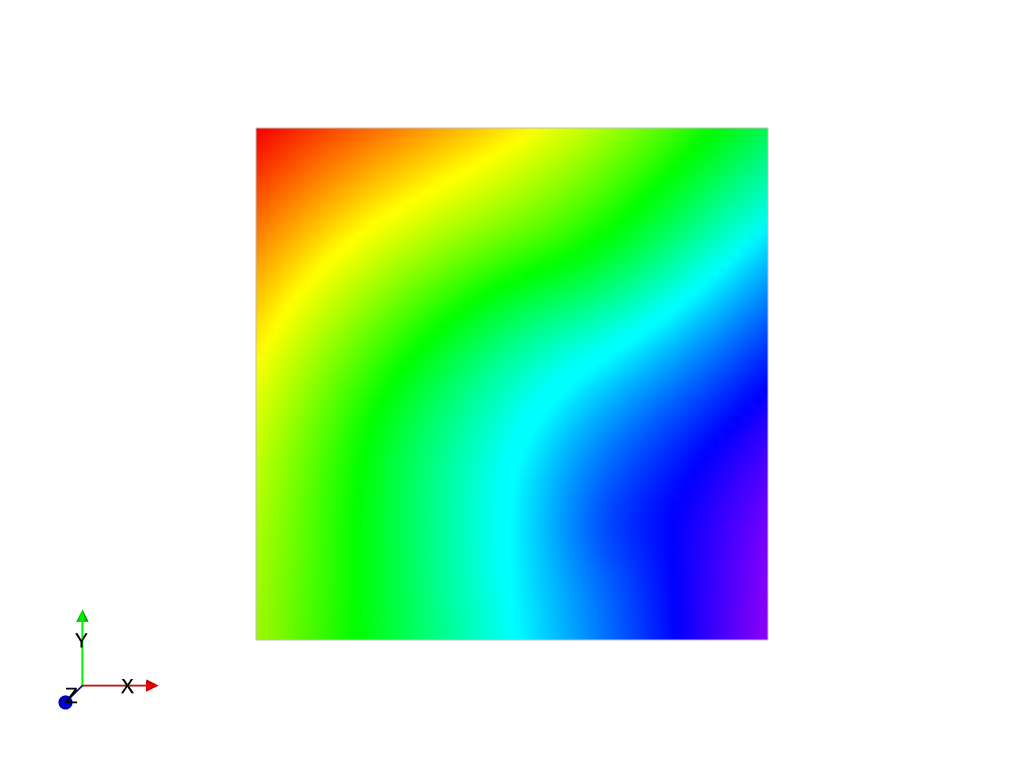

In [ ]:
view.display()

## Modelling S2




ERROR: 2022-08-29 10:18:30,790: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 10:18:30,798: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 10:18:30,805: _base_geological_feature.py:73 -- Model not set


[-3.96070387 -3.79150399 -3.62230411 ...  4.34785626  4.34724127
  4.34663168]



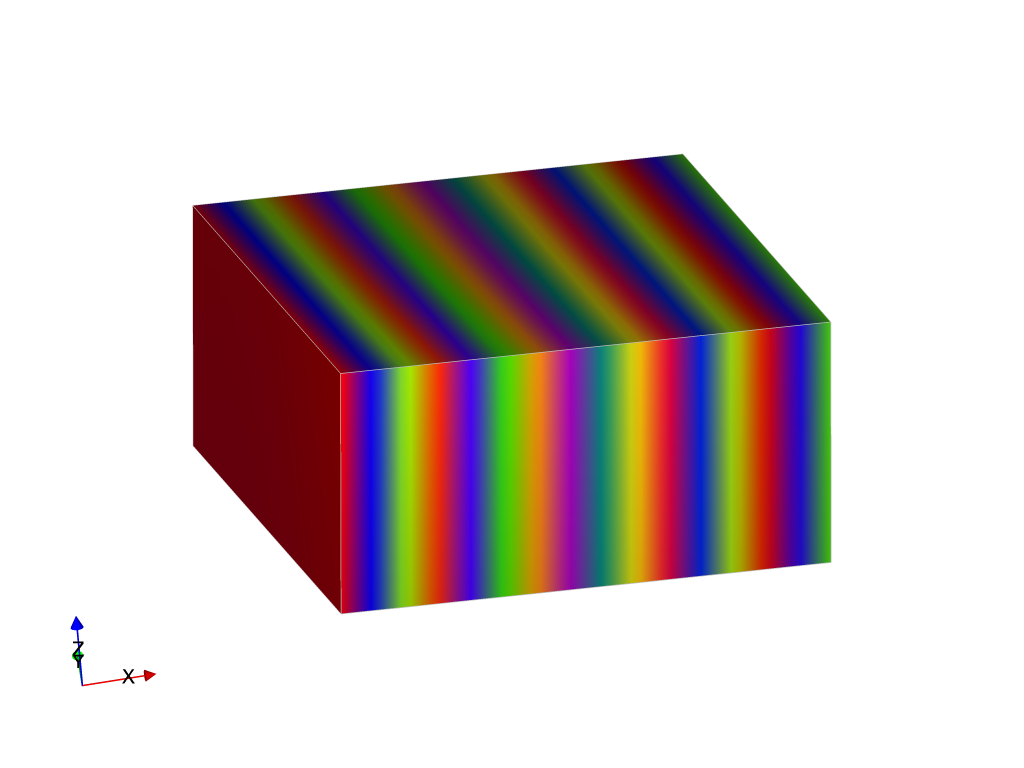

In [ ]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=10000, 
                                     buffer=0.5,
                                    solver='lu',
                                    damp=True)
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2[0],
                       cmap='prism')
viewer.add_isosurface(s2[0],
                     slices=[0,1])
viewer.add_data(s2[0])
viewer.rotate(rotation)
viewer.display()

## Modelling S1




ERROR: 2022-08-29 10:19:05,535: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 10:19:05,537: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 10:19:05,540: _base_geological_feature.py:73 -- Model not set


[ 1685.38697603  1758.15483557  1828.86807779 ... -4408.66486508
 -4539.5718906  -4669.04835064]



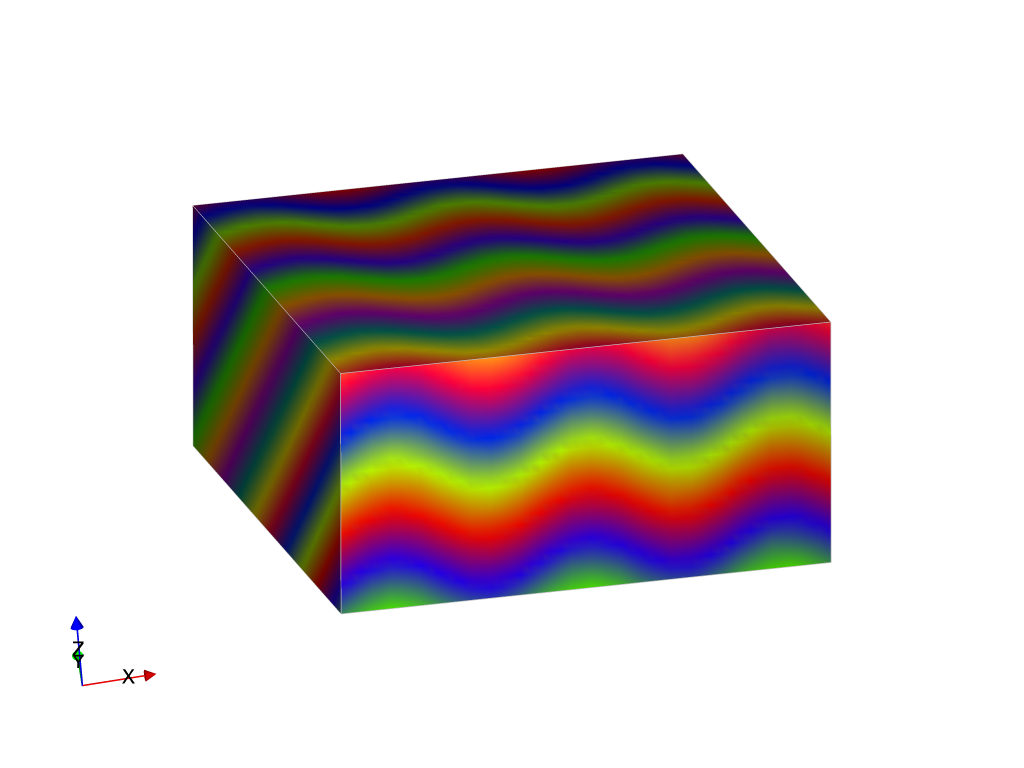

In [ ]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=4, 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.3,
                                            solver='lu'
                                           )



viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1[0],
                       cmap='prism')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

## S2/S1 S-Plots 




ERROR: 2022-08-29 10:19:20,901: _geological_feature_builder.py:281 -- Not enough constraints for scalar field add more
ERROR: 2022-08-29 10:19:22,117: _geological_feature_builder.py:281 -- Not enough constraints for scalar field add more


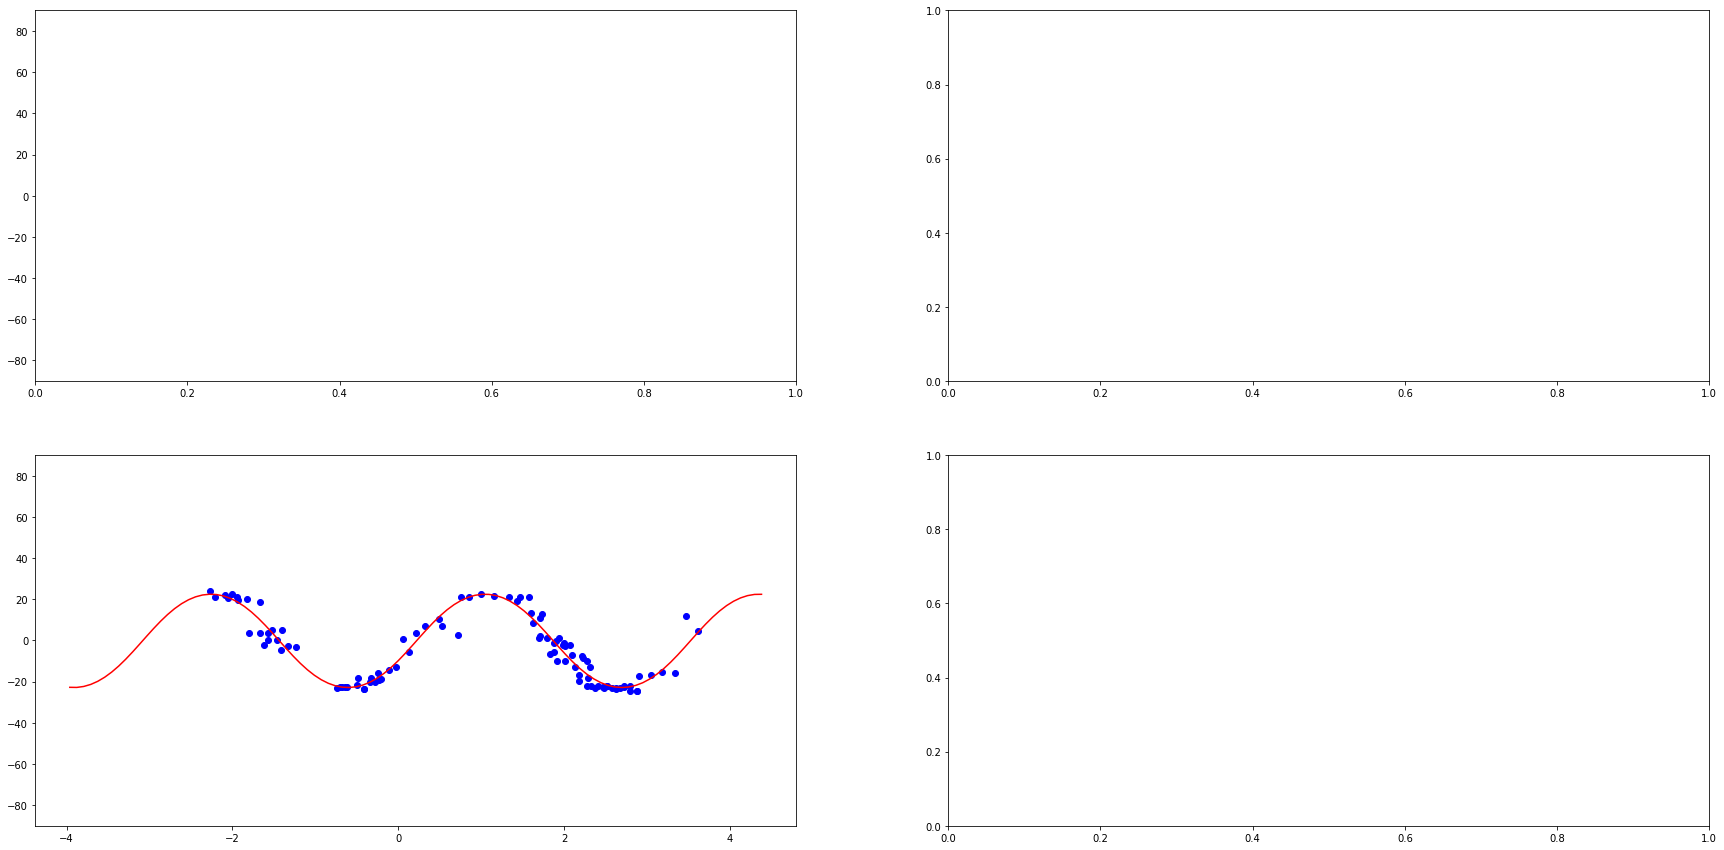

In [ ]:
s2_s1_splot = RotationAnglePlotter(s1)
s2_s1_splot.add_fold_limb_data()
s2_s1_splot.add_fold_limb_curve()  
# fig, ax = plt.subplots(1,2,figsize=(10,5))
# x = np.linspace(s2[0].min(),s2[0].max(),1000)
# ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
# ax[0].plot(s1['fold'].fold_limb_rotation.fold_frame_coordinate,s1['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

## Modelling S0




[-871.87711881 -821.79418684 -774.94107745 ...  294.66847145  352.0225501
  411.62004817]



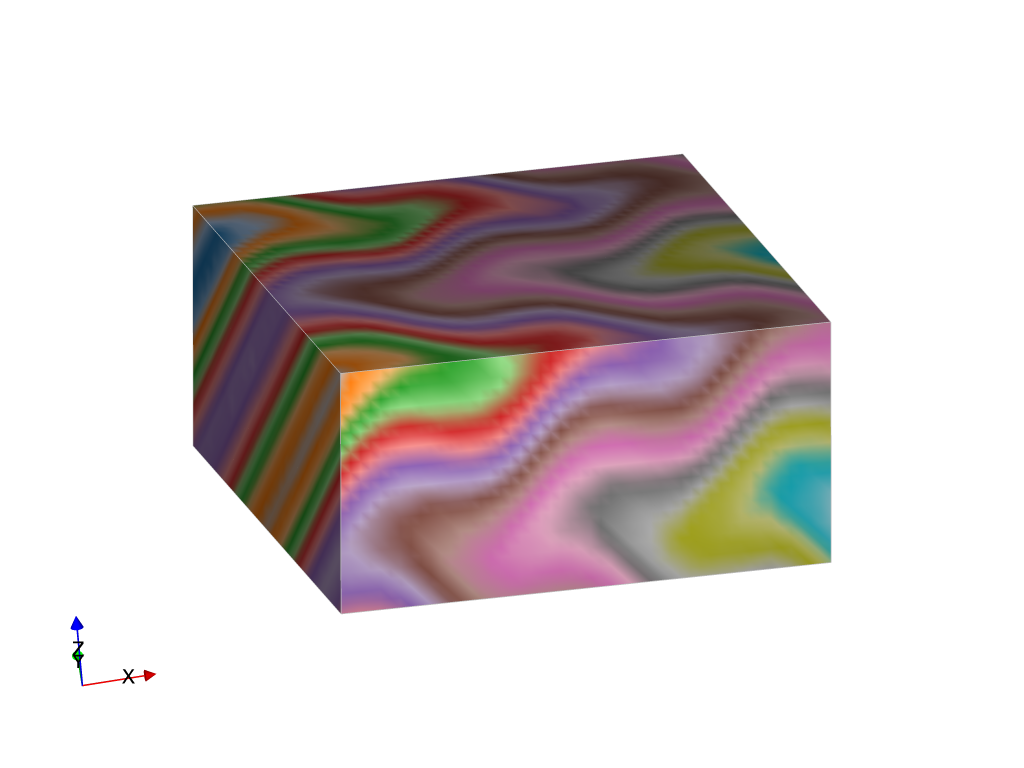

In [ ]:
s0 = model.create_and_add_folded_foliation('s0',
                                            limb_wl=4000, 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.2,
                                            damp=True,
                                           solver='lu'
                                           )

viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s0,
                       cmap='tab20')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

## S1/S0 S-Plots 





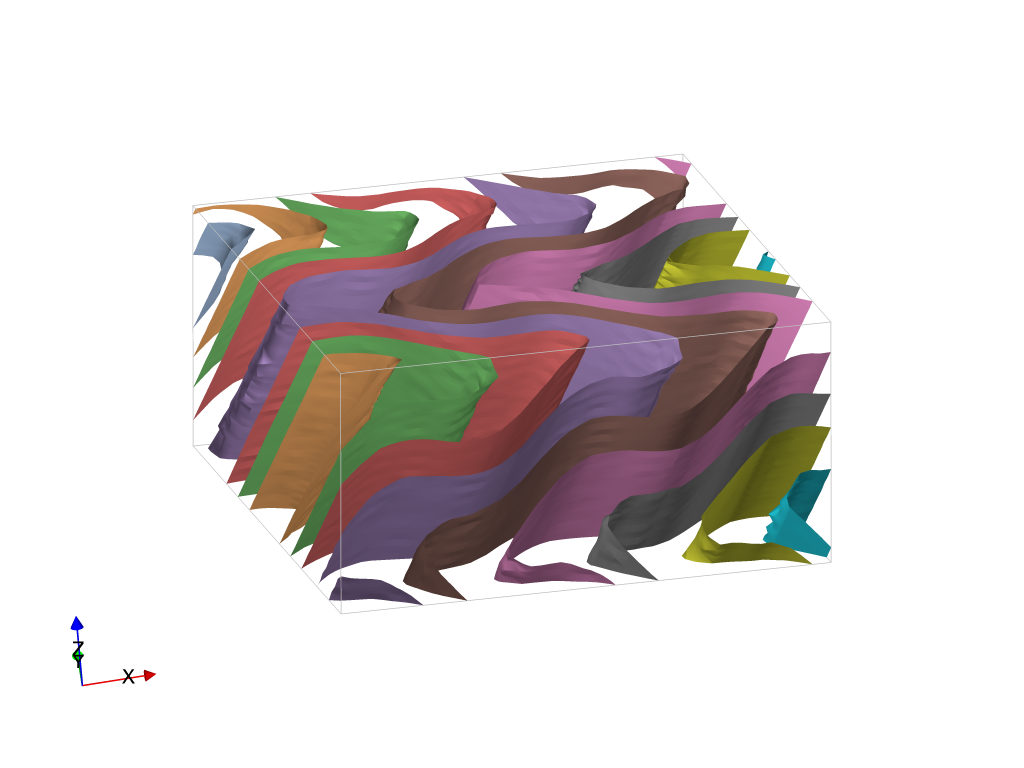

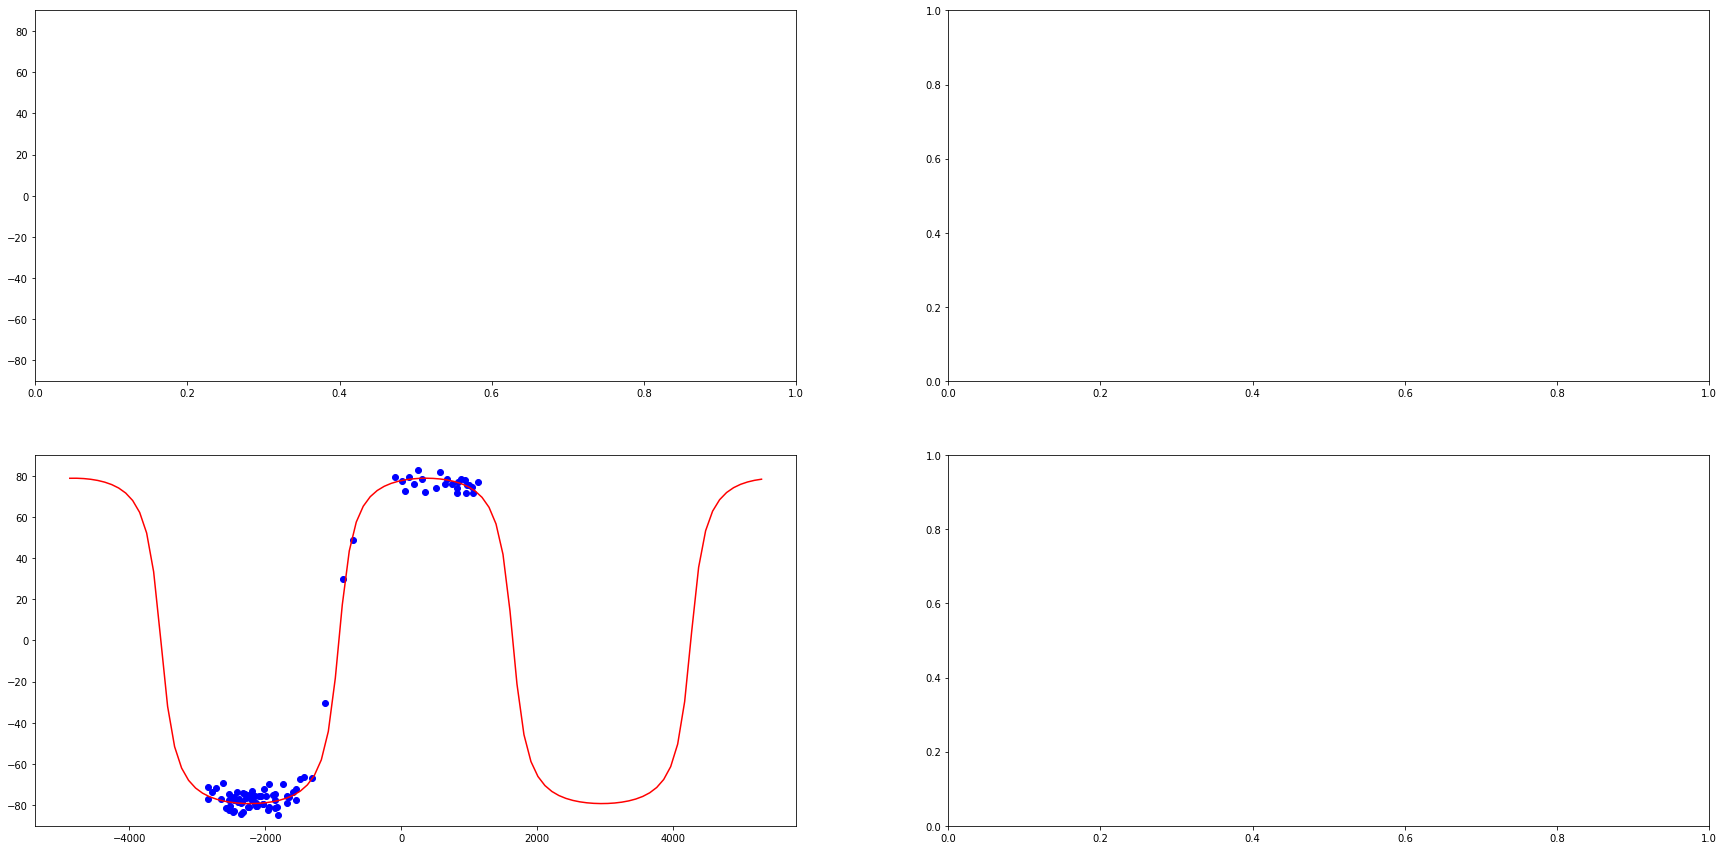

In [ ]:
s1_s0_splot = RotationAnglePlotter(s0)
s1_s0_splot.add_fold_limb_data()
s1_s0_splot.add_fold_limb_curve()

# fig, ax = plt.subplots(1,2,figsize=(10,5))
# x = np.linspace(s1[0].min(),s1[0].max(),1000)
# ax[0].plot(x,s0['fold'].fold_limb_rotation(x))
# ax[0].plot(s0['fold'].fold_limb_rotation.fold_frame_coordinate,s0['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

viewer = LavaVuModelViewer(model)
viewer.add_isosurface(s0,nslices=10,paint_with=s0,cmap='tab20')
# viewer.add_data(s0)
# viewer.add_fold(s0['fold'],locations=s0['support'].barycentre[::80])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()